# sklearn.svm.SVR

`class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)`

In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd

### Loading and Preparing dataset...

In [3]:
ds = pd.read_csv(r"C:\pritish\BigML\SupervisedLearning\Regression\Support-Vector-Regression\dataset\Position_Salaries.csv")

X = ds.iloc[:, 1]
y = ds.iloc[:, 2]

In [4]:
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [5]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [6]:
X.shape

(10,)

In [7]:
y.shape

(10,)

In [8]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [9]:
# Converting data to numpy array

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

#### Some Data preprocessing...

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We are NOT train test splitting our dataset as the it is very short (length=10)

## Preparing SVR model

We are first setting SVR to default values and in further cells we will tweak with gamma, epsilon,C, kernel and tollerence values to see what difference it will make in our model... But first let us let us discuss what are these values.

#### Parameters (of SVR):

1. kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

   **Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’,            ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a             callable is given it is used to precompute the kernel matrix.**


2. degree: int, default=3

   **Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.**
 
 
3. gamma: {‘scale’, ‘auto’} or float, default=’scale’

   **Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.**
   - if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
   - if ‘auto’, uses 1 / n_features.


4. coef0: float, default=0.0
   
   **Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.**
   
5. tol: float, default=1e-3

   **Tolerance for stopping criterion.**
   
   
6. C: float, default=1.0

   **Regularization parameter. The strength of the regularization is inversely proportional to C.        Must be strictly positive. The penalty is a squared l2 penalty.**
   
   
7. epsilon: float, default=0.1
   
   **Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is          associated in the training loss function with points predicted within a distance epsilon from the    actual value.**
   
   
8. shrinking: bool, default=True
    
   **Whether to use the shrinking heuristic.**


9. cache_size: float, default=200

   **Specify the size of the kernel cache (in MB).**
   
   
10. verbose: bool, default=False

    **Enable verbose output. Note that this setting takes advantage of a per-process runtime setting     in libsvm that, if enabled, may not work properly in a multithreaded context.**
    
    
11. max_iter: int, default=-1

    **Hard limit on iterations within solver, or -1 for no limit.**
    
    
<br><br>
Note: We don't have to use every and each Parameters for SVR we can just go forward with the default ones in the maximum cases. But we will see that what changes this parameters can make to the accuracy of our model
<br><br>
#### Methods (of SVR): 

fit(X, y[, sample_weight]): Fit the SVM model according to the given training data.

get_params([deep]): Get parameters for this estimator.

predict(X): Perform regression on samples in X.

score(X, y[, sample_weight]): Return the coefficient of determination  of the prediction.

set_params(**params): Set the parameters of this estimator.

In [12]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train.ravel())

SVR(kernel='poly')

In [13]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Now our model is trained on the values of X_train and y_train. We can now predict on the test data

In [14]:
y_pred = svr.predict(X_test)

In [15]:
print("Actual Values: ", sc_y.inverse_transform(y.ravel()))
print("Predicted Values: ", sc_y.inverse_transform(y_pred))

Actual Values:  [  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]
Predicted Values:  [141773.18650481 390029.04491306]


In [16]:
svr.score(X_test, y_test)

0.14270841991666017

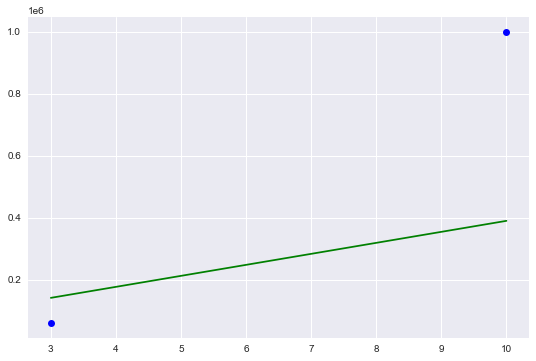

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn')

X_plot = sc_X.inverse_transform(X_test)
y_plot = sc_y.inverse_transform(y_test)

plt.plot(X_plot, y_plot, 'bo')
plt.plot(X_plot, sc_y.inverse_transform(y_pred), 'green')
plt.show()